<a href="https://colab.research.google.com/github/JayabharathiRavi/Health_Insurance/blob/main/health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING THE NEEDED PACKAGES**

In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics


## **IMPORTING DATASET**

In [2]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **DATA PREPROCESSING**

In [3]:
print(df.shape)

(1338, 7)


In [4]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


By using data description, we came to know there is no outliers in the data.


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values in data


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The data types are in right format. The data needs encoding for sex,smoker and region columns.

In [7]:
df.duplicated().sum()

1

There is only one duplicated row. we can drop that row


In [8]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Now, there is no duplicates.

Moving forward to EDA part.

## **EDA**

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Here, we gonna predict the charge amount using the features columns.


### **FEATURE DISTRIBUTION**

AGE


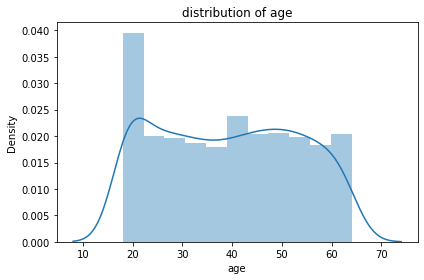

In [10]:
sns.distplot(df.age)
plt.title("distribution of age")
plt.tight_layout()

At the age of 25 to 60 it slightly looks like uniformly distributed.

SEX

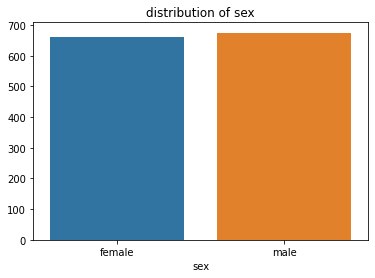

In [11]:
A=df['sex'].groupby(df['sex']).count()
sns.barplot(x=A.index,y=A.values,data=df)
plt.title("distribution of sex")
plt.show()

Sex distributed uniformly. We will go with binary encode.


BMI

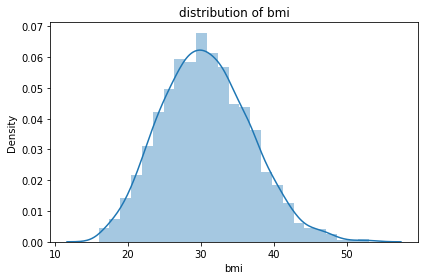

In [12]:
sns.distplot(df.bmi)
plt.title("distribution of bmi")
plt.tight_layout()

The bmi distributed normally


CHILDREN

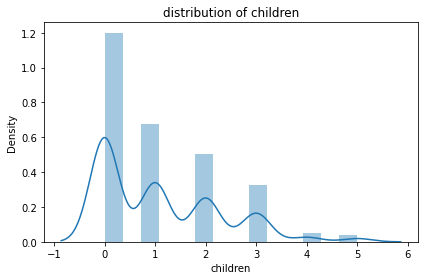

In [13]:
sns.distplot(df.children)
plt.title("distribution of children")
plt.tight_layout()

The children column distributed categorically. The people has no child acquires high in range.


SMOKER

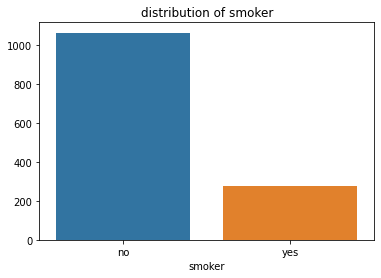

In [14]:
B=df['smoker'].groupby(df['smoker']).count()
sns.barplot(x=B.index,y=B.values,data=df)
plt.title("distribution of smoker")
plt.show()

No smoker distributed more. We will go with binary encode. 1 for yes 0 for no

REGION

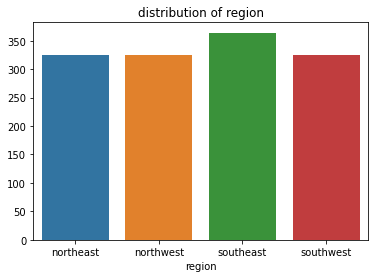

In [15]:
C=df['region'].groupby(df['region']).count()
sns.barplot(x=C.index,y=C.values,data=df)
plt.title("distribution of region")
plt.show()

Except southeast, all other regions are distributes equally. So, we can go with one-hot. 

### **FEATURES VS TARGET**

AGE


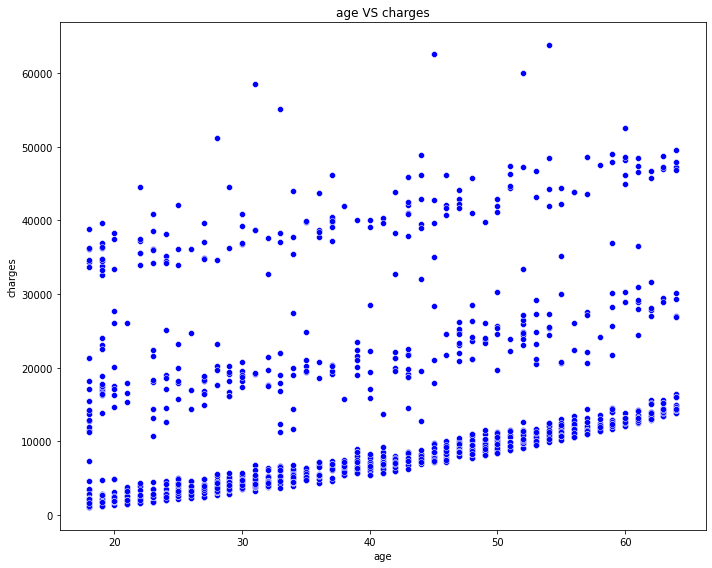

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['age'], y=df['charges'],color='blue');
plt.title('age VS charges')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

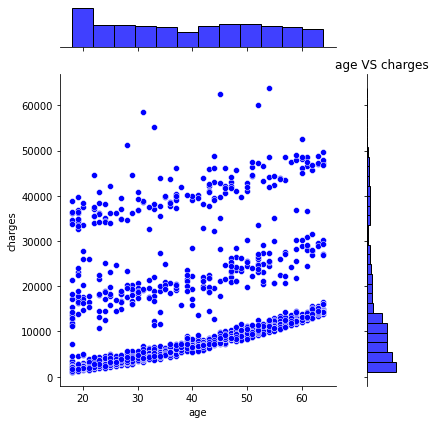

In [17]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['age'], y=df['charges'],color='blue')
plt.title('age VS charges')
plt.tight_layout()
plt.show()

SEX

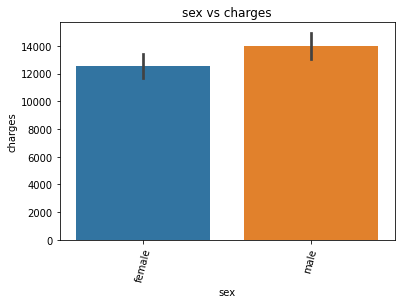

In [19]:
sns.barplot(x='sex',y='charges',data=df,order=df.groupby('sex')['charges'].mean().reset_index().sort_values('charges')['sex'])
plt.xticks(rotation=75)
plt.title('sex vs charges')
plt.show()

By analysing, Men are charges high.


BMI

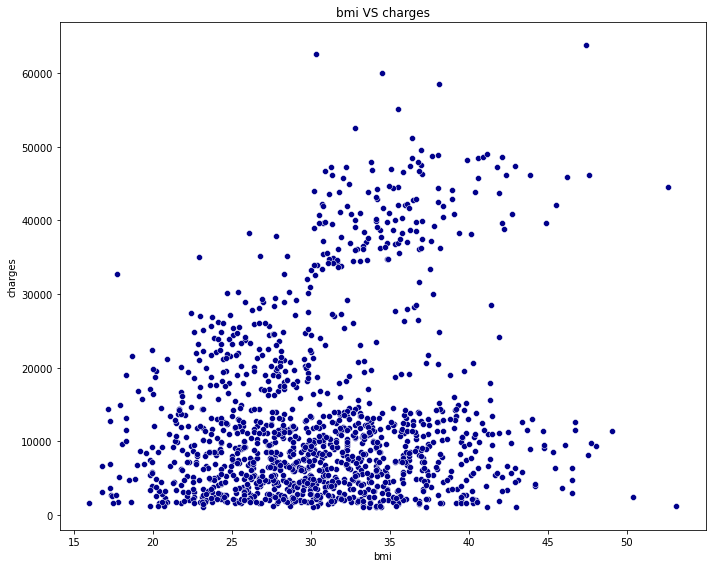

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['bmi'], y=df['charges'],color='darkblue');
plt.title('bmi VS charges')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

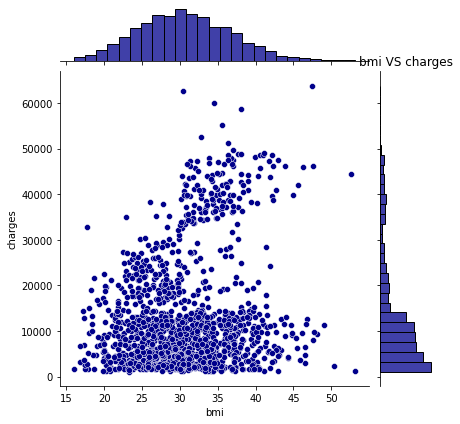

In [21]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['bmi'], y=df['charges'],color='darkblue')
plt.title('bmi VS charges')
plt.show()

CHILDREN

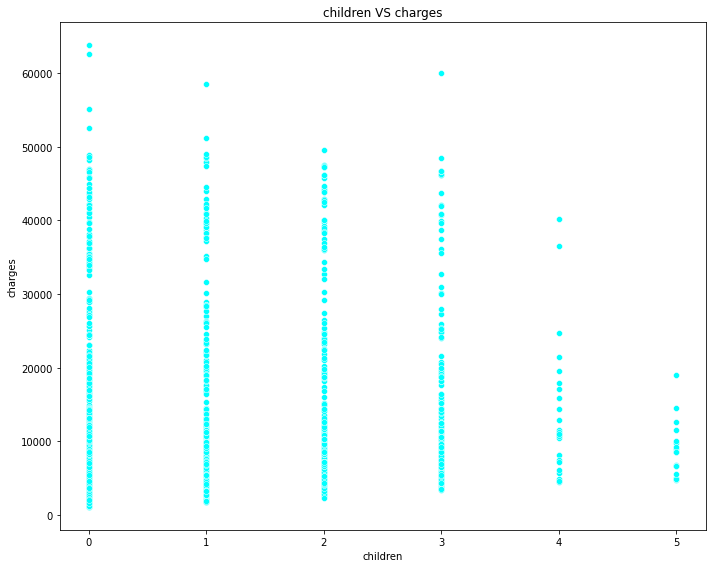

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['children'], y=df['charges'],color='cyan');
plt.title('children VS charges')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

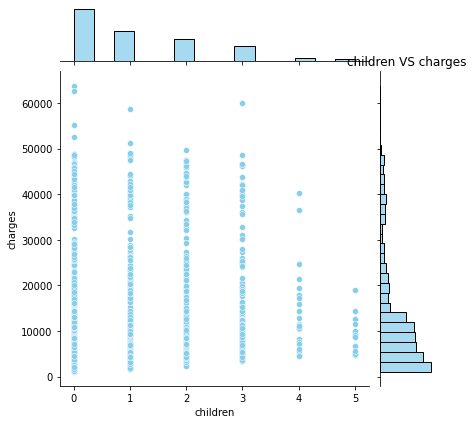

In [23]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['children'], y=df['charges'],color='skyblue')
plt.title('children VS charges')
plt.show()

SMOKER

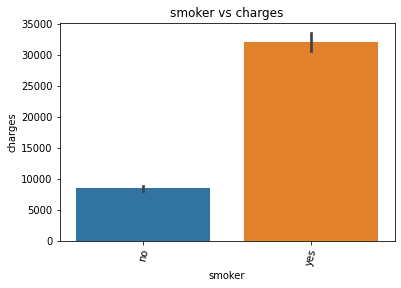

In [24]:
sns.barplot(x='smoker',y='charges',data=df,order=df.groupby('smoker')['charges'].mean().reset_index().sort_values('charges')['smoker'])
plt.xticks(rotation=75)
plt.title('smoker vs charges')
plt.show()

REGION

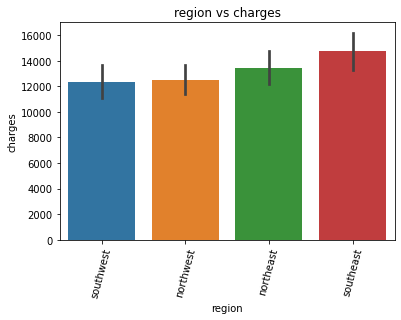

In [25]:
sns.barplot(x='region',y='charges',data=df,order=df.groupby('region')['charges'].mean().reset_index().sort_values('charges')['region'])
plt.xticks(rotation=75)
plt.title('region vs charges')
plt.show()

## **ENCODING**

### **LABEL**

In [26]:
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'no':0,'yes':1})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### **ONE-HOT**

In [27]:
df= pd.get_dummies(df, columns=["region"])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## **FEATURE SELECTION**

In [28]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker','region_northeast', 'region_northwest', 'region_southeast','region_southwest']]
Y=df['charges']

## **SPLITTING**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## **FITTING XGBOOST MODEL**

In [30]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [33]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,2]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.5767523534966181  Cross-Val score :  0.5578904595534462
Learning rate :  0.02  Train score :  0.8273074275624588  Cross-Val score :  0.8074160437670933
Learning rate :  0.03  Train score :  0.8664639873748345  Cross-Val score :  0.8429212804148015
Learning rate :  0.04  Train score :  0.8759028952725912  Cross-Val score :  0.8479585896841602
Learning rate :  0.05  Train score :  0.8807786308266072  Cross-Val score :  0.8490192821749879
Learning rate :  0.06  Train score :  0.885515195447198  Cross-Val score :  0.8487983177443843
Learning rate :  0.07  Train score :  0.8880975903968606  Cross-Val score :  0.8477253857822322
Learning rate :  0.08  Train score :  0.8902580336715724  Cross-Val score :  0.8477570296733946
Learning rate :  0.09  Train score :  0.8943893281049042  Cross-Val score :  0.8466952162464685
Learning rate :  0.1  Train score :  0.8961507822350505  Cross-Val score :  0.844759416909026
Learning rate :  0.11  Train score :  0.898

In [34]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 0.05, n_estimators=100)
xgb.fit(x_train,y_train)

[07:08:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05)

In [35]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
856,40974.16490,42015.171875
778,5934.37980,6592.208008
65,1743.21400,3254.836914
624,12129.61415,14403.184570
1007,24915.22085,25864.101562
...,...,...
173,5246.04700,5885.931641
1197,5699.83750,6506.393555
539,27346.04207,11809.510742
46,3393.35635,6545.911621


## **EVALUATION METRIC**

In [36]:
print(metrics.r2_score(xgb.predict(X_test),y_test))

0.8773149394098092


## **FEATURE IMPORTANCE**

In [37]:
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(['age', 'sex', 'bmi', 'children', 'smoker','region_northeast', 'region_northwest', 'region_southeast','region_southwest'], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: smoker               Importance: 0.8500000238418579
Variable: bmi                  Importance: 0.07999999821186066
Variable: age                  Importance: 0.03999999910593033
Variable: children             Importance: 0.009999999776482582
Variable: region_northeast     Importance: 0.009999999776482582
Variable: region_northwest     Importance: 0.009999999776482582
Variable: sex                  Importance: 0.0
Variable: region_southeast     Importance: 0.0
Variable: region_southwest     Importance: 0.0
